Исходное облако: 100000 точек
BBox фильтрация: 3552 точек
Высокие точки (Z>80): 20177 точек
Точки в радиусе 20: 3295 точек
Точки в круге XY (R=15): 7094 точек


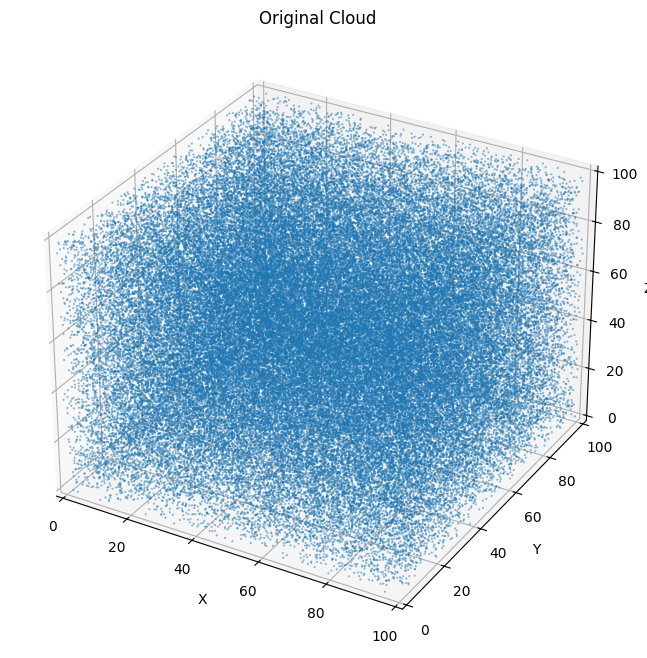

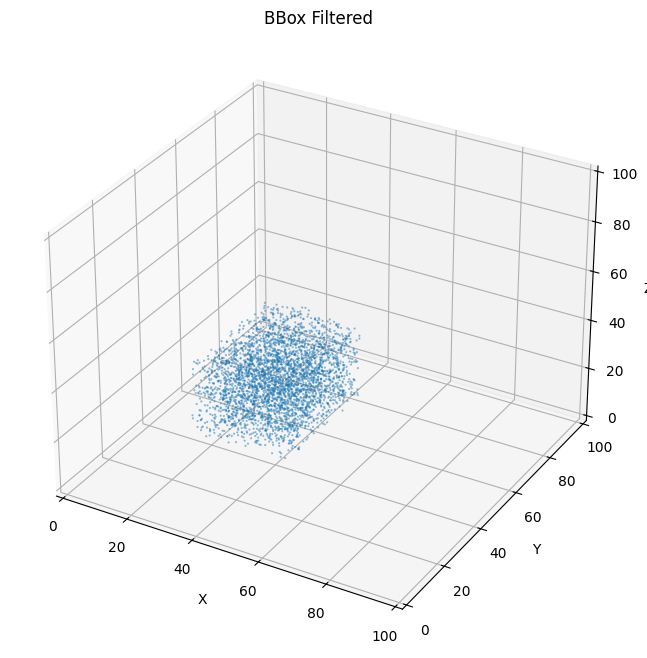

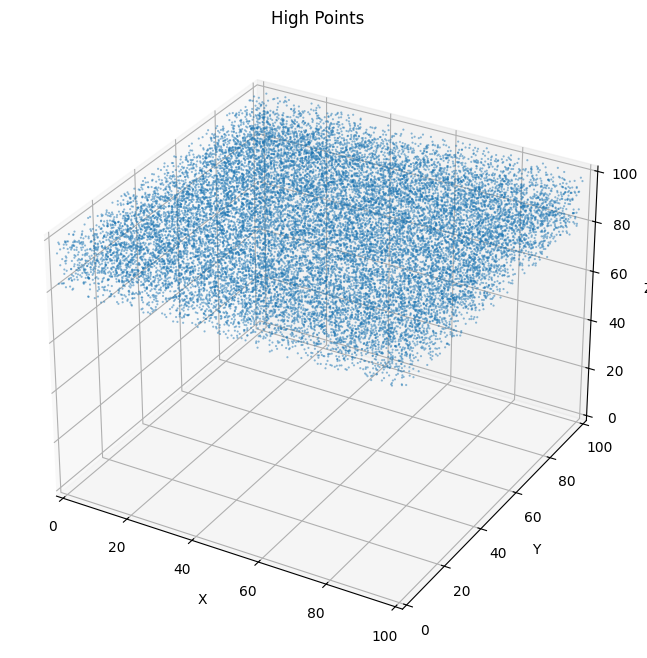

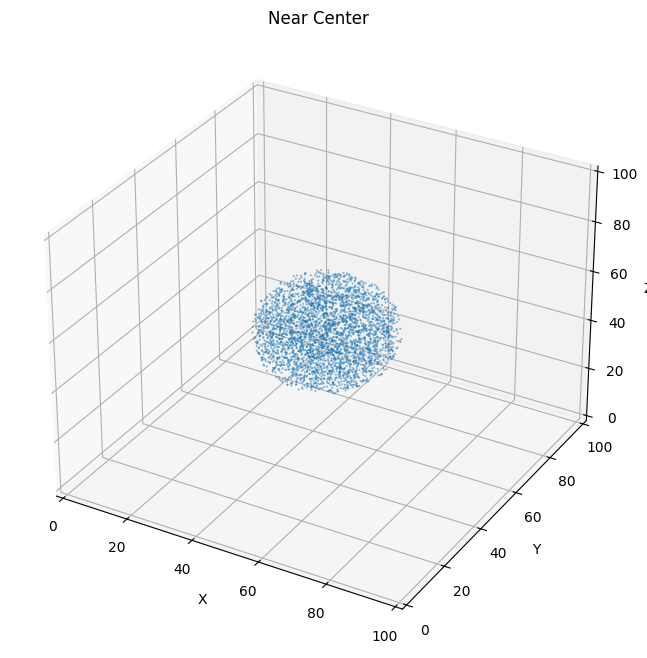

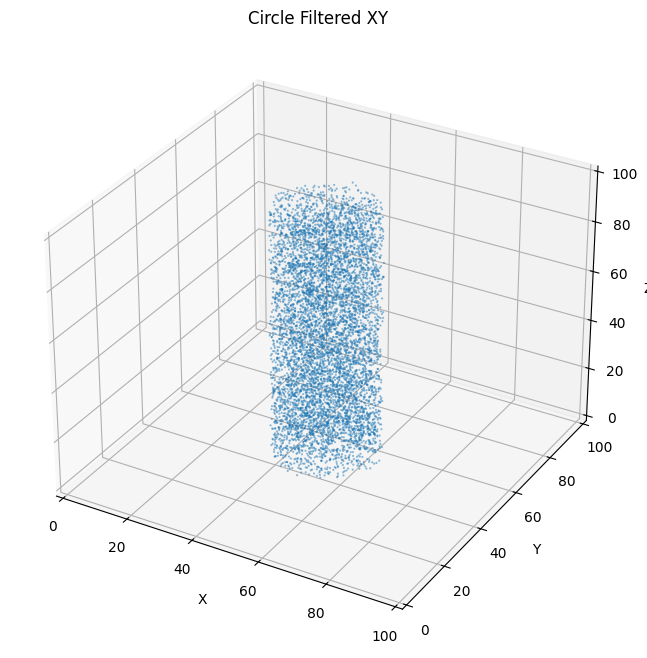

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

points = np.random.uniform(0, 100, size=(100000, 3))
np.savetxt("synthetic_cloud.xyz", points)
print(f"Исходное облако: {points.shape[0]} точек")


def filter_by_bbox(points, xmin, xmax, ymin, ymax, zmin, zmax):
    mask = (
        (points[:, 0] >= xmin) & (points[:, 0] <= xmax) &
        (points[:, 1] >= ymin) & (points[:, 1] <= ymax) &
        (points[:, 2] >= zmin) & (points[:, 2] <= zmax)
    )
    return points[mask]

filtered = filter_by_bbox(points, 20, 50, 30, 70, 10, 40)
np.savetxt("bbox_filtered.xyz", filtered)
print(f"BBox фильтрация: {filtered.shape[0]} точек")

high_points = points[points[:, 2] > 80]
np.savetxt("high_points.xyz", high_points)
print(f"Высокие точки (Z>80): {high_points.shape[0]} точек")


def filter_by_distance(points, center, radius):
    distances = np.linalg.norm(points - center, axis=1)
    return points[distances <= radius]

center = np.array([50, 50, 50])
radius = 20
near_center = filter_by_distance(points, center, radius)
np.savetxt("near_center.xyz", near_center)
print(f"Точки в радиусе {radius}: {near_center.shape[0]} точек")

def filter_by_circle_xy(points, center_xy, radius):
    center_2d = np.array([center_xy[0], center_xy[1], 0])
    points_2d = points.copy()
    points_2d[:, 2] = 0
    distances = np.linalg.norm(points_2d - center_2d, axis=1)
    return points[distances <= radius]

circle_center = (50, 50)
circle_radius = 15
circle_filtered = filter_by_circle_xy(points, circle_center, circle_radius)
np.savetxt("circle_filtered.xyz", circle_filtered)
print(f"Точки в круге XY (R={circle_radius}): {circle_filtered.shape[0]} точек")

def show_cloud(points, title="Point Cloud"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.3, alpha=0.5)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.set_zlim(0, 100)
    plt.savefig(f"{title.replace(' ', '_')}.png", dpi=150, bbox_inches='tight')
    plt.show()

show_cloud(points, "Original Cloud")
show_cloud(filtered, "BBox Filtered")
show_cloud(high_points, "High Points")
show_cloud(near_center, "Near Center")
show_cloud(circle_filtered, "Circle Filtered XY")
